# Example fits

In [1]:
import open3d as o3d
import geomfitty.plot
from geomfitty import geom3d, fit3d
import numpy as np
import matplotlib.pyplot as plt

## Line

In [2]:
points = np.random.uniform(low=-1, high=1, size=(100, 3))
points[:, :2] /= 10
rotation = o3d.geometry.get_rotation_matrix_from_axis_angle([0,1,1])
points = (rotation @ points.T).T

In [3]:
line = fit3d.line_fit(points)
line

Line(anchor_point=[-0.001596706465804525, 0.0015775936300262384, -0.010619718508543026], direction=[-0.6981573603961638, -0.41333547139692367, -0.5845768454273091])

### Use buildin plot functionality
This will open a new interactive window using o3d visualizer

In [4]:
geomfitty.plot.plot([points, line], display_coordinate_frame=True)

### Using the Open3D JVisualizer
If you wish to use Open3D visualizer directly you can use the `geomfitty.plot.to_open3d_geom` to convert geomfitty geometries to Open3D LineSets

In [5]:
vis = o3d.visualization.Visualizer()
vis.create_window()
vis.add_geometry(geomfitty.plot.to_open3d_geom(line, length=2.0))
vis.add_geometry(geomfitty.plot.to_open3d_geom(points))
vis.poll_events()
vis.update_renderer()
vis.capture_screen_image("line_fit.jpg")
vis.destroy_window()

### Plot using matplotlib
Plotting using matplotlib works, but can be verbose and does not by default result in interactive plots.

In [6]:
line_points = line.anchor_point + np.outer(np.linspace(-1, 1, 100), line.direction)

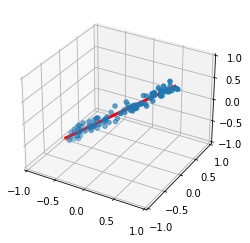

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.scatter(*points.T)
ax.plot(*line_points.T, "r", lw=3)